# Import Required Libraries
Import all necessary libraries including TensorFlow/Keras, NumPy, Matplotlib, Seaborn, and other visualization tools.

In [9]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load and Explore AMHCD Dataset
Load the AMHCD dataset from the provided folder, explore its structure, examine data distribution, and display dataset statistics.

In [12]:
# Load and Explore AMHCD Dataset
from tensorflow.keras.preprocessing.image import load_img, img_to_array

DATASET_PATH = "./AMHCD/AMHCD_64/AMHCD_64"
LABELS = "C:\\Users\\A\\Desktop\\Deep_Learning\\Laste TPs\\AMHCD\\labels\\labels\\33-common-latin-tifinagh.txt"

# Check if files exist
if not os.path.exists(LABELS):
    print(f"Warning: Labels file not found at {LABELS}")
    print("Using folder names as classes.")
    if os.path.exists(DATASET_PATH):
        classes = [folder for folder in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, folder))]
        classes.sort()
        print(f"{len(classes)} classes found.")
    else:
        raise FileNotFoundError(f"Error: Dataset path not found at {DATASET_PATH}")
else:
    # Load labels
    with open(LABELS, "r") as file:
        classes = file.read().splitlines()

# Map class names to indices
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

# Load dataset
images = []
labels = []
for cls in classes:
    cls_folder = os.path.join(DATASET_PATH, cls)
    if not os.path.exists(cls_folder):
        print(f"Warning: Folder not found for class {cls}")
        continue
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = load_img(img_path, target_size=(64, 64))  # Resize image to 64x64
            img = img_to_array(img)  # Convert to numpy array
            images.append(img)
            labels.append(class_to_idx[cls])
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with {len(classes)} classes.")

Loaded 25740 images with 33 classes.


# Data Preprocessing and Augmentation
Normalize pixel values, reshape data for LeNet-5 input requirements, split into train/validation/test sets, and implement data augmentation techniques.

In [13]:
# Data Preprocessing and Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values
images = images / 255.0

# Reshape data for LeNet-5 input
images = images.reshape(-1, 64, 64, 3)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (18018, 64, 64, 3), Validation set: (3861, 64, 64, 3), Test set: (3861, 64, 64, 3)


# Visualize Dataset Samples
Create comprehensive visualizations showing sample images from each class, class distribution histograms, and pixel intensity distributions.

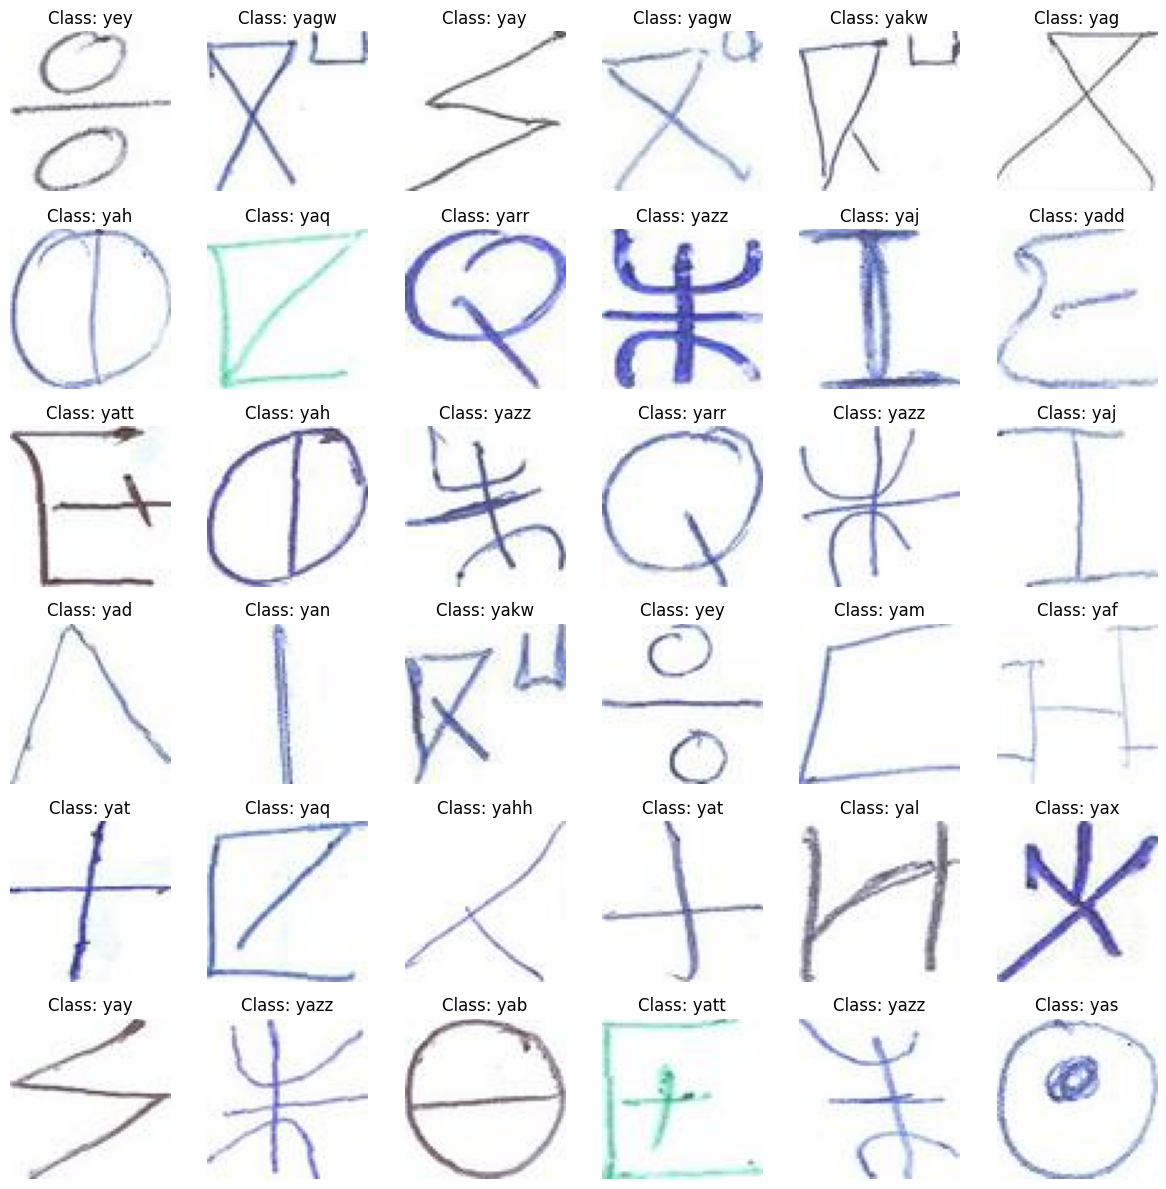

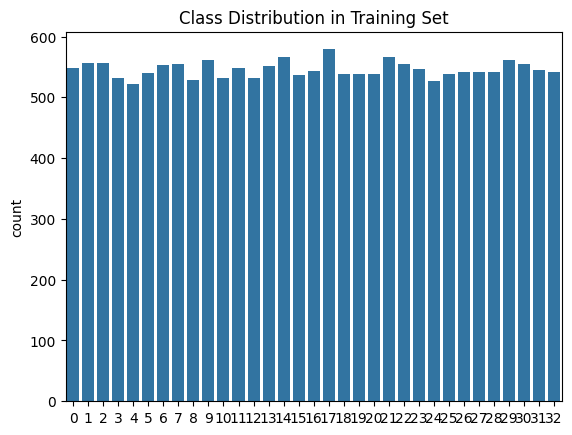

In [14]:
# Visualize Dataset Samples
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()
for i in range(36):
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(f"Class: {idx_to_class[y_train[idx]]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Class distribution
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.show()

# LeNet-5 Architecture Implementation
Implement the complete LeNet-5 architecture adapted for RGB images, including convolutional layers, pooling layers, and fully connected layers with detailed layer specifications.

In [15]:
# LeNet-5 Architecture Implementation
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(len(classes), activation='softmax')
])

model.summary()

c:\Users\A\Desktop\Deep_Learning\Laste TPs\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 60, 60, 6)      ‚îÇ           456 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 30, 30, 6)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 26, 26, 16)     ‚îÇ         2,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 13, 13, 16)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 2704)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 120)            ‚îÇ       324,600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 84)             ‚îÇ        10,164 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 33)             ‚îÇ         2,805 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 340,441 (1.30 MB)

 Trainable params: 340,441 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation and Configuration
Configure the model with appropriate optimizer, loss function, and metrics. Set up callbacks for training monitoring and model checkpointing.

In [16]:
# Model Compilation and Configuration
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, early_stopping]

# Training the Model
Train the LeNet-5 model on the AMHCD dataset with proper batch size, epochs, and validation monitoring.

In [17]:
# Training the Model
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks
)

c:\Users\A\Desktop\Deep_Learning\Laste TPs\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 111ms/step - accuracy: 0.3455 - loss: 2.3580

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70s 119ms/step - accuracy: 0.5668 - loss: 1.5452 - val_accuracy: 0.9148 - val_loss: 0.3200
Epoch 2/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 107ms/step - accuracy: 0.8225 - loss: 0.6000

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61s 109ms/step - accuracy: 0.8402 - loss: 0.5301 - val_accuracy: 0.9552 - val_loss: 0.1575
Epoch 3/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57s 101ms/step - accuracy: 0.8785 - loss: 0.3945 - val_accuracy: 0.9529 - val_loss: 0.1598
Epoch 4/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 97ms/step - accuracy: 0.9000 - loss: 0.3260 - val_accuracy: 0.9472 - val_loss: 0.1580
Epoch 5/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 84ms/step - accuracy: 0.9104 - loss: 0.2916

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 86ms/step - accuracy: 0.9121 - loss: 0.2885 - val_accuracy: 0.9663 - val_loss: 0.1058
Epoch 6/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 84ms/step - accuracy: 0.9191 - loss: 0.2691 - val_accuracy: 0.9684 - val_loss: 0.1166
Epoch 7/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 83ms/step - accuracy: 0.9298 - loss: 0.2363 - val_accuracy: 0.9624 - val_loss: 0.1230
Epoch 8/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 92ms/step - accuracy: 0.9288 - loss: 0.2289 - val_accuracy: 0.9671 - val_loss: 0.1069
Epoch 9/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 81ms/step - accuracy: 0.9328 - loss: 0.2198

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46s 82ms/step - accuracy: 0.9333 - loss: 0.2141 - val_accuracy: 0.9731 - val_loss: 0.0963
Epoch 10/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 66ms/step - accuracy: 0.9377 - loss: 0.2003

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 68ms/step - accuracy: 0.9389 - loss: 0.1983 - val_accuracy: 0.9720 - val_loss: 0.0926
Epoch 11/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 85ms/step - accuracy: 0.9442 - loss: 0.1913

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 88ms/step - accuracy: 0.9433 - loss: 0.1917 - val_accuracy: 0.9759 - val_loss: 0.0821
Epoch 12/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 81ms/step - accuracy: 0.9427 - loss: 0.1822

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 83ms/step - accuracy: 0.9429 - loss: 0.1803 - val_accuracy: 0.9816 - val_loss: 0.0751
Epoch 13/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step - accuracy: 0.9491 - loss: 0.1695

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 80ms/step - accuracy: 0.9494 - loss: 0.1656 - val_accuracy: 0.9816 - val_loss: 0.0674
Epoch 14/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 83ms/step - accuracy: 0.9506 - loss: 0.1643 - val_accuracy: 0.9811 - val_loss: 0.0730
Epoch 15/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 65ms/step - accuracy: 0.9535 - loss: 0.1555 - val_accuracy: 0.9819 - val_loss: 0.0753
Epoch 16/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step - accuracy: 0.9500 - loss: 0.1589

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 87ms/step - accuracy: 0.9529 - loss: 0.1540 - val_accuracy: 0.9811 - val_loss: 0.0644
Epoch 17/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 67ms/step - accuracy: 0.9570 - loss: 0.1444

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 69ms/step - accuracy: 0.9562 - loss: 0.1432 - val_accuracy: 0.9839 - val_loss: 0.0570
Epoch 18/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 61ms/step - accuracy: 0.9567 - loss: 0.1496 - val_accuracy: 0.9829 - val_loss: 0.0617
Epoch 19/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step - accuracy: 0.9585 - loss: 0.1404

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 60ms/step - accuracy: 0.9588 - loss: 0.1369 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 20/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 62ms/step - accuracy: 0.9588 - loss: 0.1448 - val_accuracy: 0.9816 - val_loss: 0.0613
Epoch 21/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 63ms/step - accuracy: 0.9566 - loss: 0.1429 - val_accuracy: 0.9795 - val_loss: 0.0718
Epoch 22/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44s 79ms/step - accuracy: 0.9629 - loss: 0.1196 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 23/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 89ms/step - accuracy: 0.9600 - loss: 0.1272 - val_accuracy: 0.9811 - val_loss: 0.0672
Epoch 24/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49s 87ms/step - accuracy: 0.9600 - loss: 0.1308 - val_accuracy: 0.9816 - val

564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 62ms/step - accuracy: 0.9660 - loss: 0.1132 - val_accuracy: 0.9870 - val_loss: 0.0447
Epoch 28/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 67ms/step - accuracy: 0.9675 - loss: 0.1125 - val_accuracy: 0.9816 - val_loss: 0.0653
Epoch 29/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 63ms/step - accuracy: 0.9621 - loss: 0.1213 - val_accuracy: 0.9785 - val_loss: 0.0698
Epoch 30/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 92ms/step - accuracy: 0.9673 - loss: 0.1065 - val_accuracy: 0.9850 - val_loss: 0.0578
Epoch 31/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 86ms/step - accuracy: 0.9648 - loss: 0.1124 - val_accuracy: 0.9803 - val_loss: 0.0668
Epoch 32/50
564/564 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 91ms/step - accuracy: 0.9664 - loss: 0.1053 - val_accuracy: 0.9852 - val

# Training History Visualization
Plot training and validation accuracy/loss curves, analyze overfitting/underfitting, and visualize learning progression.

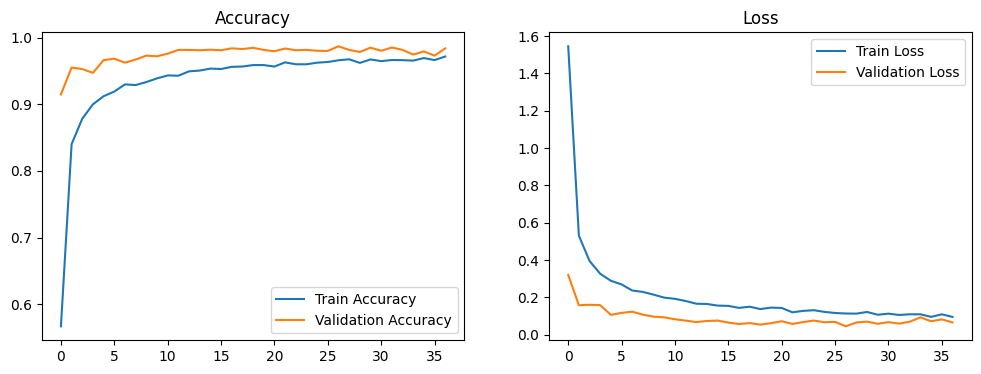

In [18]:
# Training History Visualization
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Model Evaluation and Metrics
Evaluate the trained model on test set, calculate accuracy, precision, recall, F1-score, and other relevant metrics.

In [19]:
# Model Evaluation and Metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=classes))

121/121 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 11ms/step
Classification Report:
              precision    recall  f1-score   support

          ya       1.00      1.00      1.00       103
         yab       0.98      1.00      0.99       108
        yach       1.00      0.98      0.99       121
         yad       1.00      1.00      1.00       118
        yadd       0.99      0.99      0.99       138
         yae       0.99      1.00      1.00       130
         yaf       1.00      1.00      1.00       111
         yag       1.00      0.98      0.99       126
        yagh       1.00      0.99      1.00       122
        yagw       0.99      1.00      1.00       100
         yah       0.98      0.99      0.99       117
        yahh       0.99      1.00      1.00       123
         yaj       0.99      0.99      0.99       105
         yak       0.94      0.98      0.96       112
        yakw       0.98      0.99      0.99       115
         yal       1.00      0

# Confusion Matrix and Classification Report
Generate and visualize confusion matrix, create detailed classification report with per-class metrics, and analyze model performance per class.

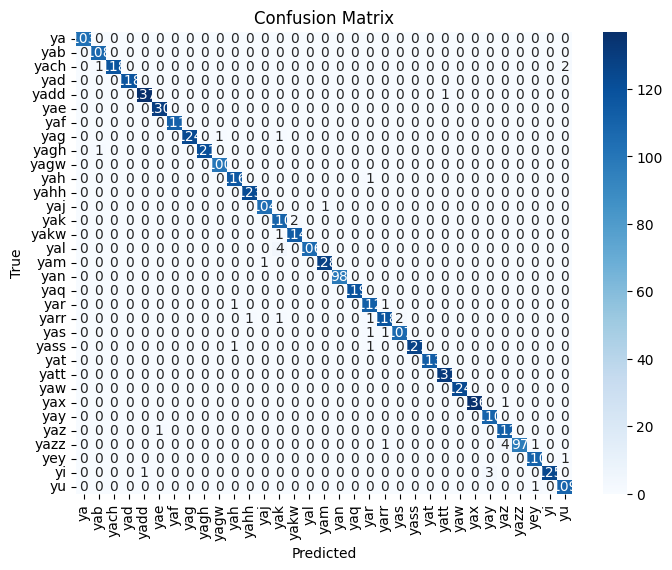

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))  # R√©duit de (10, 8) √† (8, 6)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prediction Visualization on Test Set
Visualize model predictions on test samples, show correct and incorrect predictions, and analyze failure cases with sample images.

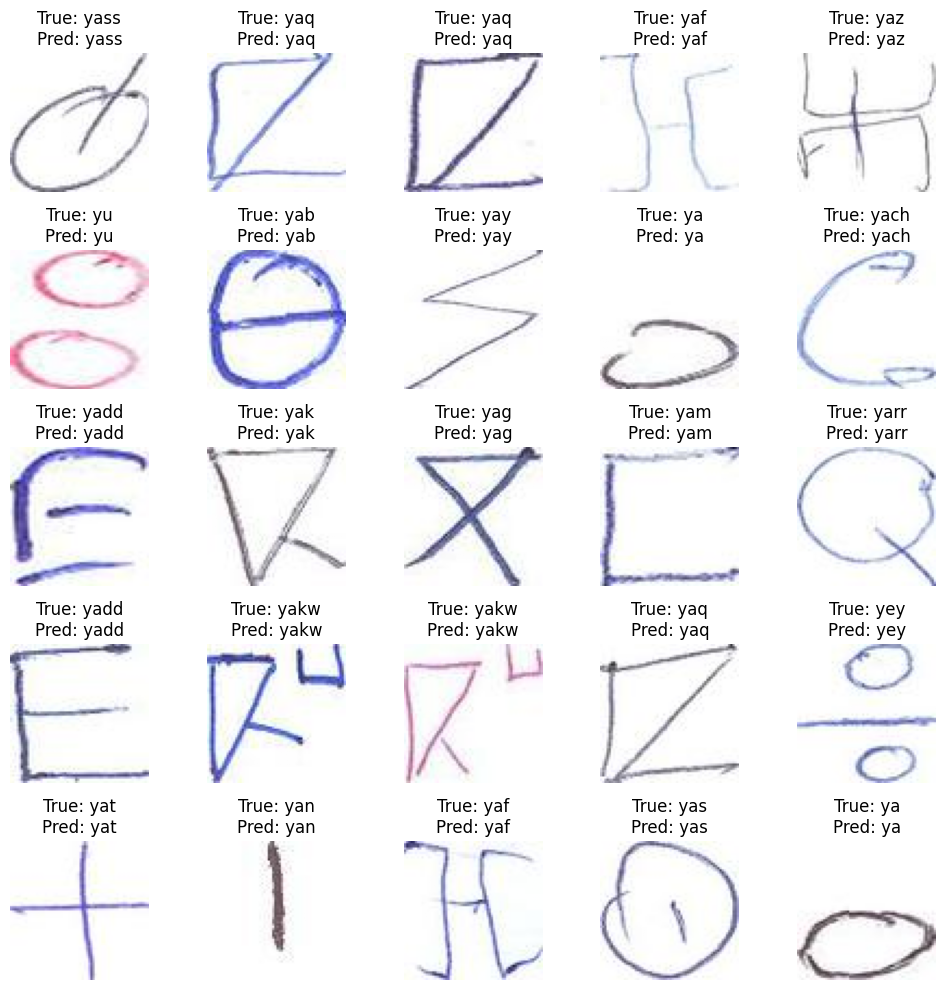

In [50]:
# Prediction Visualization
fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # R√©duit de (12, 12) √† (10, 10)
axes = axes.ravel()
for i in range(25):
    idx = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f"True: {idx_to_class[y_test[idx]]}\nPred: {idx_to_class[y_pred_classes[idx]]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Model Performance Analysis
Conduct comprehensive analysis of model performance including feature map visualizations, architectural analysis, and comparison with baseline results.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 745ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 745ms/step


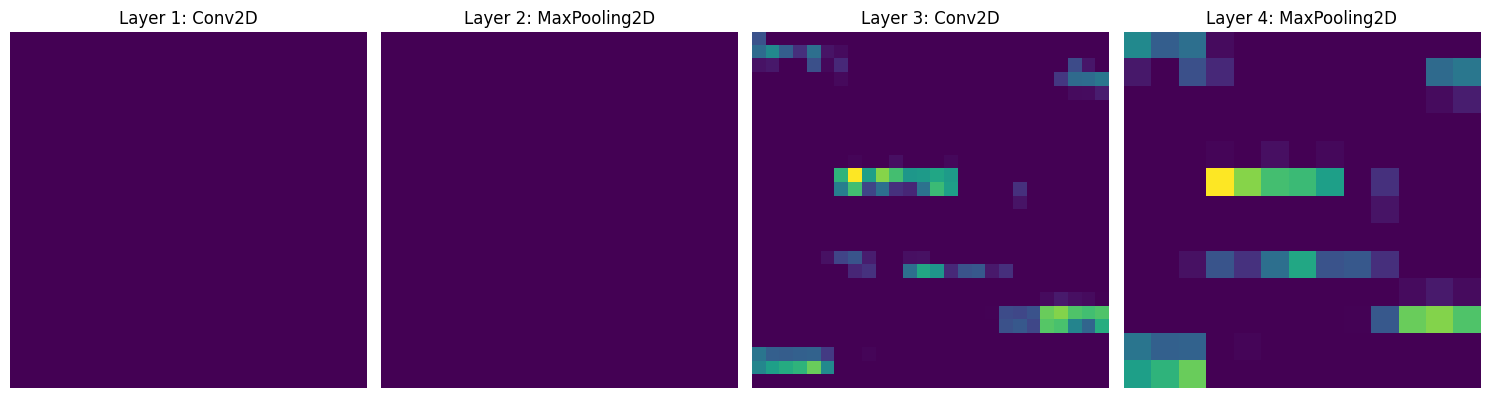

In [51]:
# Feature Map Visualization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create a new model with explicit input layer for visualization
input_layer = Input(shape=(64, 64, 3))
x = input_layer

# Get the outputs from the first 4 layers (2 Conv2D + 2 MaxPooling2D)
layer_outputs = []
for i, layer in enumerate(model.layers[:4]):
    x = layer(x)
    layer_outputs.append(x)

# Create activation model
activation_model = Model(inputs=input_layer, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(X_test[:1])

# Visualize feature maps
fig, axes = plt.subplots(1, len(activations), figsize=(15, 6))  # R√©duit de (20, 8) √† (15, 6)
for i, activation in enumerate(activations):
    if len(activation.shape) == 4:  # Check if it's a conv layer output
        axes[i].imshow(activation[0, :, :, 0], cmap='viridis')
    else:  # For pooling layers, reshape if needed
        reshaped = activation[0].reshape(activation[0].shape[0], activation[0].shape[1], -1)
        axes[i].imshow(reshaped[:, :, 0], cmap='viridis')
    axes[i].set_title(f"Layer {i+1}: {model.layers[i].__class__.__name__}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Visualisation D√©taill√©e des Feature Maps
Visualiser plusieurs feature maps de chaque couche convolutionnelle pour mieux comprendre les patterns d√©tect√©s.

Shape de la premi√®re couche: (1, 60, 60, 6)


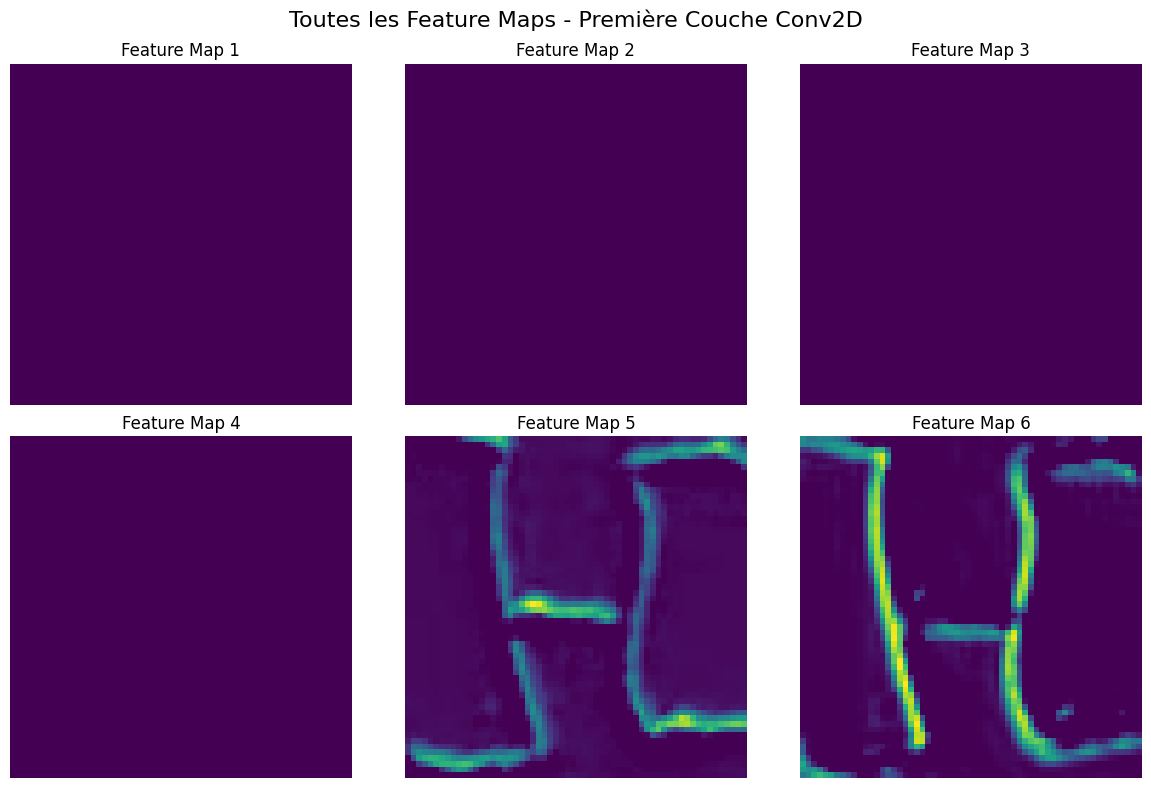

Shape de la deuxi√®me couche: (1, 26, 26, 16)


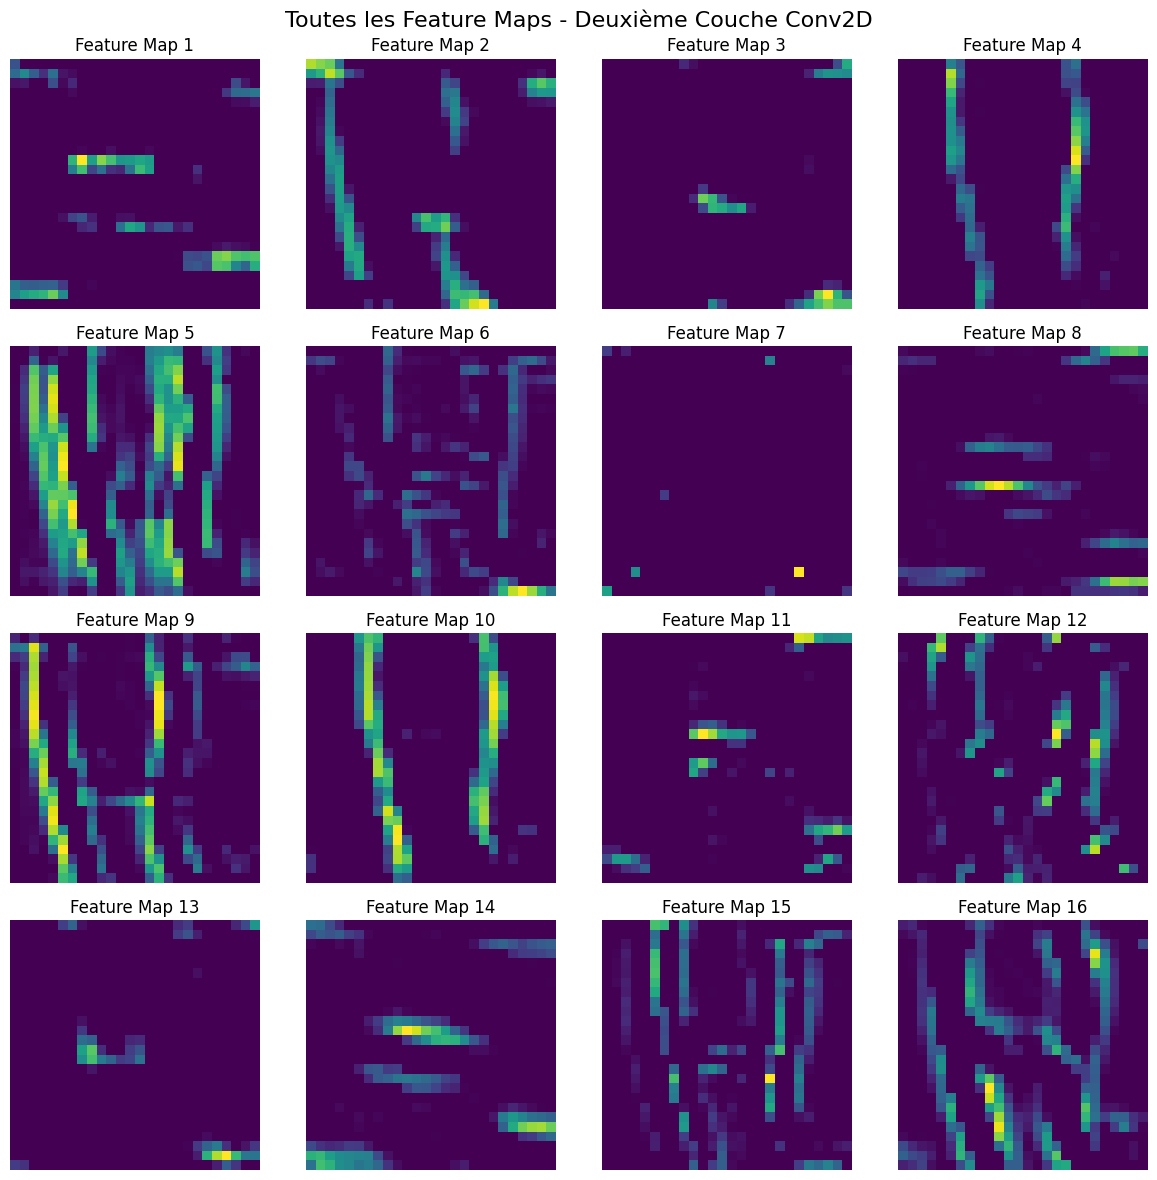

In [52]:
# Visualisation d√©taill√©e des feature maps - Premi√®re couche convolutionnelle
conv1_activation = activations[0]  # Premi√®re couche Conv2D
print(f"Shape de la premi√®re couche: {conv1_activation.shape}")

# Visualiser toutes les 6 feature maps de la premi√®re couche
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # R√©duit de (15, 10) √† (12, 8)
axes = axes.ravel()
for i in range(6):
    axes[i].imshow(conv1_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis('off')
plt.suptitle("Toutes les Feature Maps - Premi√®re Couche Conv2D", fontsize=16)
plt.tight_layout()
plt.show()

# Visualiser toutes les 16 feature maps de la deuxi√®me couche
conv2_activation = activations[2]  # Deuxi√®me couche Conv2D
print(f"Shape de la deuxi√®me couche: {conv2_activation.shape}")

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # R√©duit de (15, 15) √† (12, 12)
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(conv2_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis('off')
plt.suptitle("Toutes les Feature Maps - Deuxi√®me Couche Conv2D", fontsize=16)
plt.tight_layout()
plt.show()

# Analyse des Filtres et Poids du Mod√®le
Visualiser les filtres appris par les couches convolutionnelles et analyser la distribution des poids.

Shape des filtres Conv1: (5, 5, 3, 6)


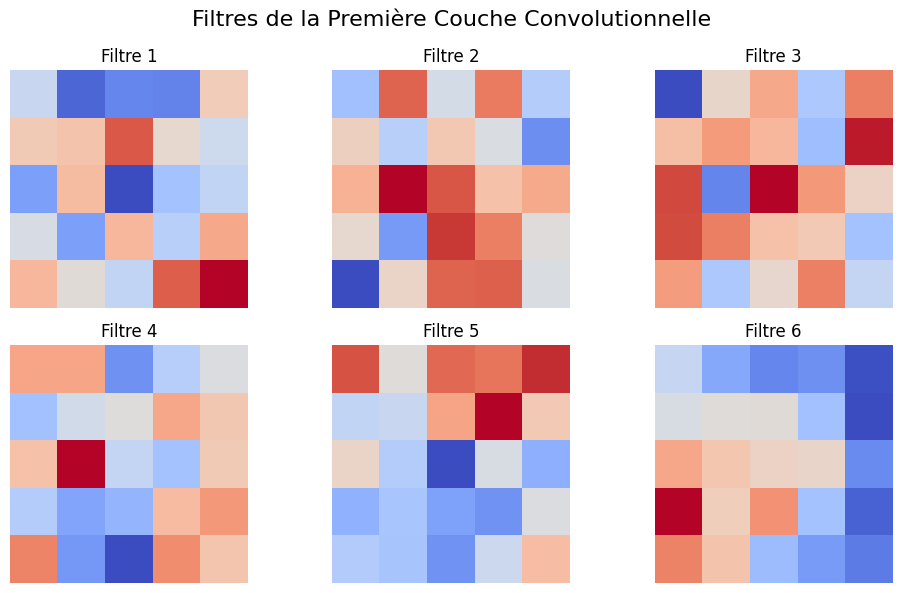

C:\Users\A\AppData\Local\Temp\ipykernel_6028\1899721956.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([conv1_weights.flatten(), conv2_weights.flatten()],


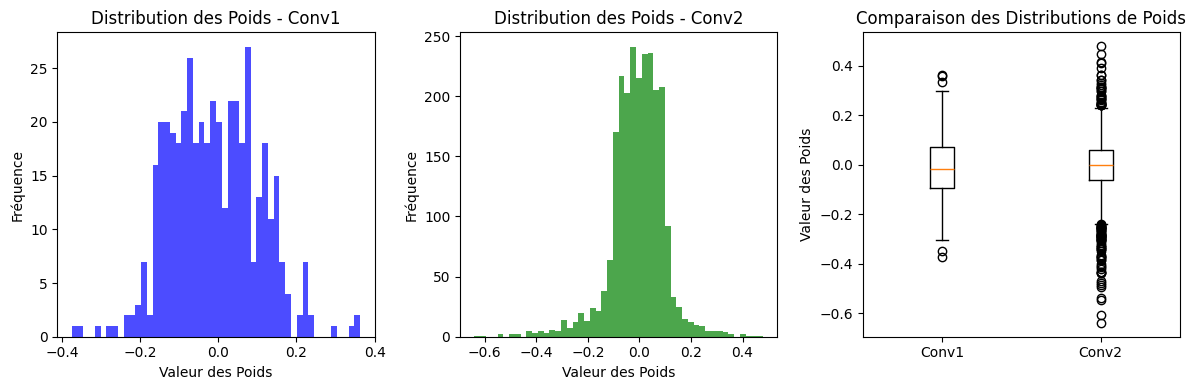

In [53]:
# Visualisation des filtres de la premi√®re couche convolutionnelle
conv1_weights = model.layers[0].get_weights()[0]  # R√©cup√©rer les poids
print(f"Shape des filtres Conv1: {conv1_weights.shape}")

# Normaliser les poids pour la visualisation
def normalize_filter(filter_array):
    min_val = filter_array.min()
    max_val = filter_array.max()
    if max_val > min_val:
        return (filter_array - min_val) / (max_val - min_val)
    return filter_array

# Visualiser les 6 filtres de la premi√®re couche
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # R√©duit de (12, 8) √† (10, 6)
axes = axes.ravel()
for i in range(6):
    filter_img = conv1_weights[:, :, :, i]
    # Moyenner sur les canaux RGB pour la visualisation
    filter_avg = np.mean(filter_img, axis=2)
    filter_norm = normalize_filter(filter_avg)
    axes[i].imshow(filter_norm, cmap='coolwarm')
    axes[i].set_title(f"Filtre {i+1}")
    axes[i].axis('off')
plt.suptitle("Filtres de la Premi√®re Couche Convolutionnelle", fontsize=16)
plt.tight_layout()
plt.show()

# Distribution des poids
plt.figure(figsize=(12, 4))  # R√©duit de (15, 5) √† (12, 4)

# Histogramme des poids Conv1
plt.subplot(1, 3, 1)
plt.hist(conv1_weights.flatten(), bins=50, alpha=0.7, color='blue')
plt.title("Distribution des Poids - Conv1")
plt.xlabel("Valeur des Poids")
plt.ylabel("Fr√©quence")

# Histogramme des poids Conv2
conv2_weights = model.layers[2].get_weights()[0]
plt.subplot(1, 3, 2)
plt.hist(conv2_weights.flatten(), bins=50, alpha=0.7, color='green')
plt.title("Distribution des Poids - Conv2")
plt.xlabel("Valeur des Poids")
plt.ylabel("Fr√©quence")

# Boxplot comparatif
plt.subplot(1, 3, 3)
plt.boxplot([conv1_weights.flatten(), conv2_weights.flatten()], 
            labels=['Conv1', 'Conv2'])
plt.title("Comparaison des Distributions de Poids")
plt.ylabel("Valeur des Poids")

plt.tight_layout()
plt.show()

# Analyse D√©taill√©e des Performances par Classe
Analyser les performances du mod√®le pour chaque classe avec des visualisations d√©taill√©es.

M√©triques par classe:
   Class  Precision  Recall  F1-Score  Support
0     ya      1.000   1.000     1.000      103
1    yab      0.982   1.000     0.991      108
2   yach      1.000   0.975     0.987      121
3    yad      1.000   1.000     1.000      118
4   yadd      0.993   0.993     0.993      138
5    yae      0.992   1.000     0.996      130
6    yaf      1.000   1.000     1.000      111
7    yag      1.000   0.984     0.992      126
8   yagh      1.000   0.992     0.996      122
9   yagw      0.990   1.000     0.995      100
10   yah      0.983   0.991     0.987      117
11  yahh      0.992   1.000     0.996      123
12   yaj      0.990   0.990     0.990      105
13   yak      0.940   0.982     0.961      112
14  yakw      0.983   0.991     0.987      115
15   yal      1.000   0.964     0.981      110
16   yam      0.992   0.992     0.992      129
17   yan      1.000   1.000     1.000       98
18   yaq      1.000   1.000     1.000      119
19   yar      0.966   0.982     0.974

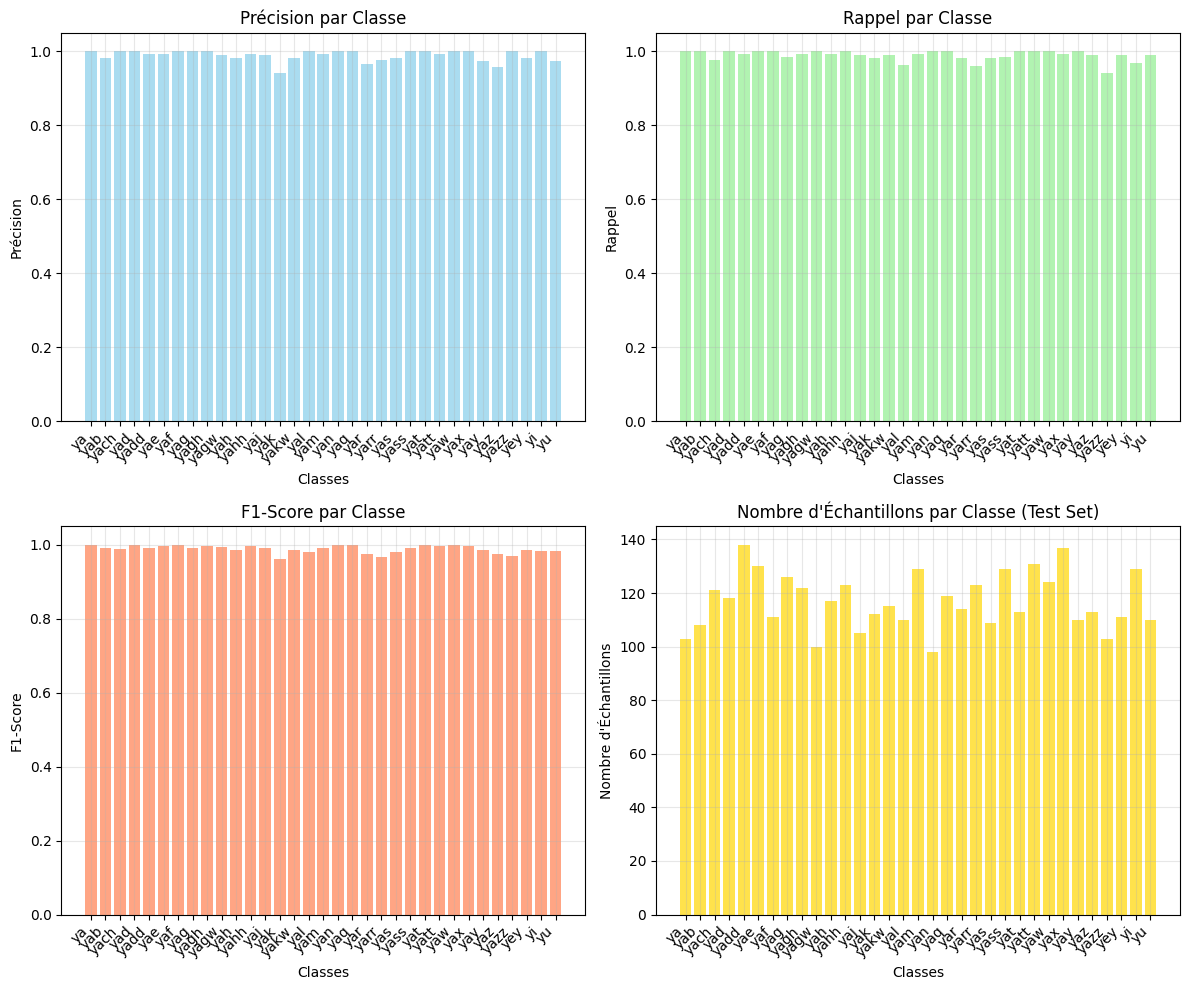

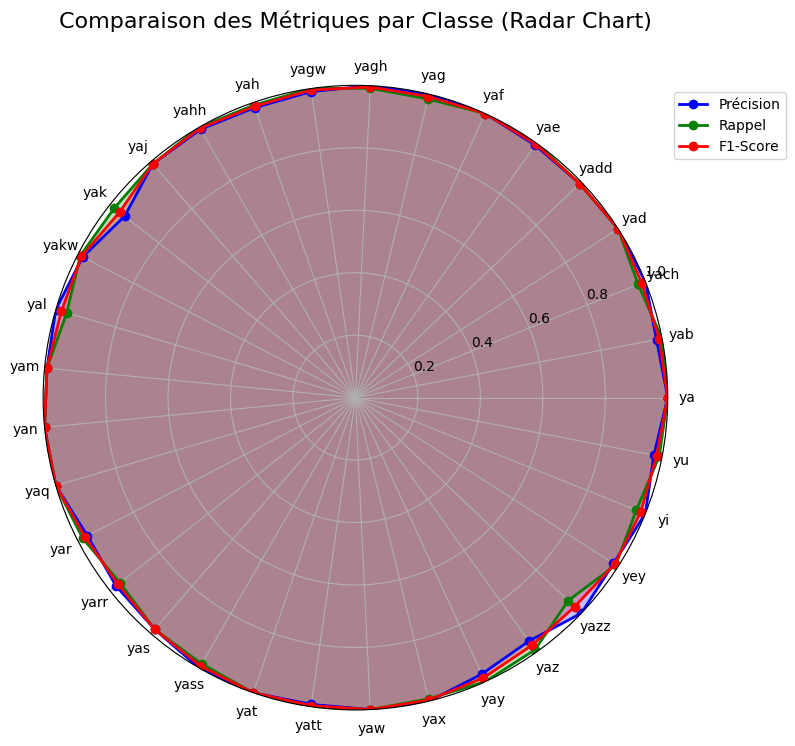

In [54]:
# Analyse des performances par classe
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculer les m√©triques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_classes)

# Cr√©er un DataFrame pour faciliter la visualisation
import pandas as pd
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("M√©triques par classe:")
print(metrics_df.round(3))

# Visualisations des m√©triques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # R√©duit de (16, 12) √† (12, 10)

# Graphique en barres pour la pr√©cision
axes[0, 0].bar(range(len(classes)), precision, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Pr√©cision par Classe')
axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Pr√©cision')
axes[0, 0].set_xticks(range(len(classes)))
axes[0, 0].set_xticklabels(classes, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# Graphique en barres pour le rappel
axes[0, 1].bar(range(len(classes)), recall, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Rappel par Classe')
axes[0, 1].set_xlabel('Classes')
axes[0, 1].set_ylabel('Rappel')
axes[0, 1].set_xticks(range(len(classes)))
axes[0, 1].set_xticklabels(classes, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# Graphique en barres pour le F1-Score
axes[1, 0].bar(range(len(classes)), f1, color='coral', alpha=0.7)
axes[1, 0].set_title('F1-Score par Classe')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xticks(range(len(classes)))
axes[1, 0].set_xticklabels(classes, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# Support (nombre d'√©chantillons) par classe
axes[1, 1].bar(range(len(classes)), support, color='gold', alpha=0.7)
axes[1, 1].set_title('Nombre d\'√âchantillons par Classe (Test Set)')
axes[1, 1].set_xlabel('Classes')
axes[1, 1].set_ylabel('Nombre d\'√âchantillons')
axes[1, 1].set_xticks(range(len(classes)))
axes[1, 1].set_xticklabels(classes, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graphique radar pour comparer les m√©triques
angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))  # R√©duit de (10, 10) √† (8, 8)

# Ajouter les m√©triques
precision_plot = precision.tolist() + [precision[0]]
recall_plot = recall.tolist() + [recall[0]]
f1_plot = f1.tolist() + [f1[0]]

ax.plot(angles, precision_plot, 'o-', linewidth=2, label='Pr√©cision', color='blue')
ax.fill(angles, precision_plot, alpha=0.25, color='blue')
ax.plot(angles, recall_plot, 'o-', linewidth=2, label='Rappel', color='green')
ax.fill(angles, recall_plot, alpha=0.25, color='green')
ax.plot(angles, f1_plot, 'o-', linewidth=2, label='F1-Score', color='red')
ax.fill(angles, f1_plot, alpha=0.25, color='red')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.set_title('Comparaison des M√©triques par Classe (Radar Chart)', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

# Analyse des Erreurs et Cas Difficiles
Identifier et visualiser les cas o√π le mod√®le fait des erreurs pour comprendre ses limitations.

Nombre d'erreurs: 42
Nombre de pr√©dictions correctes: 3819
Taux d'erreur: 1.09%


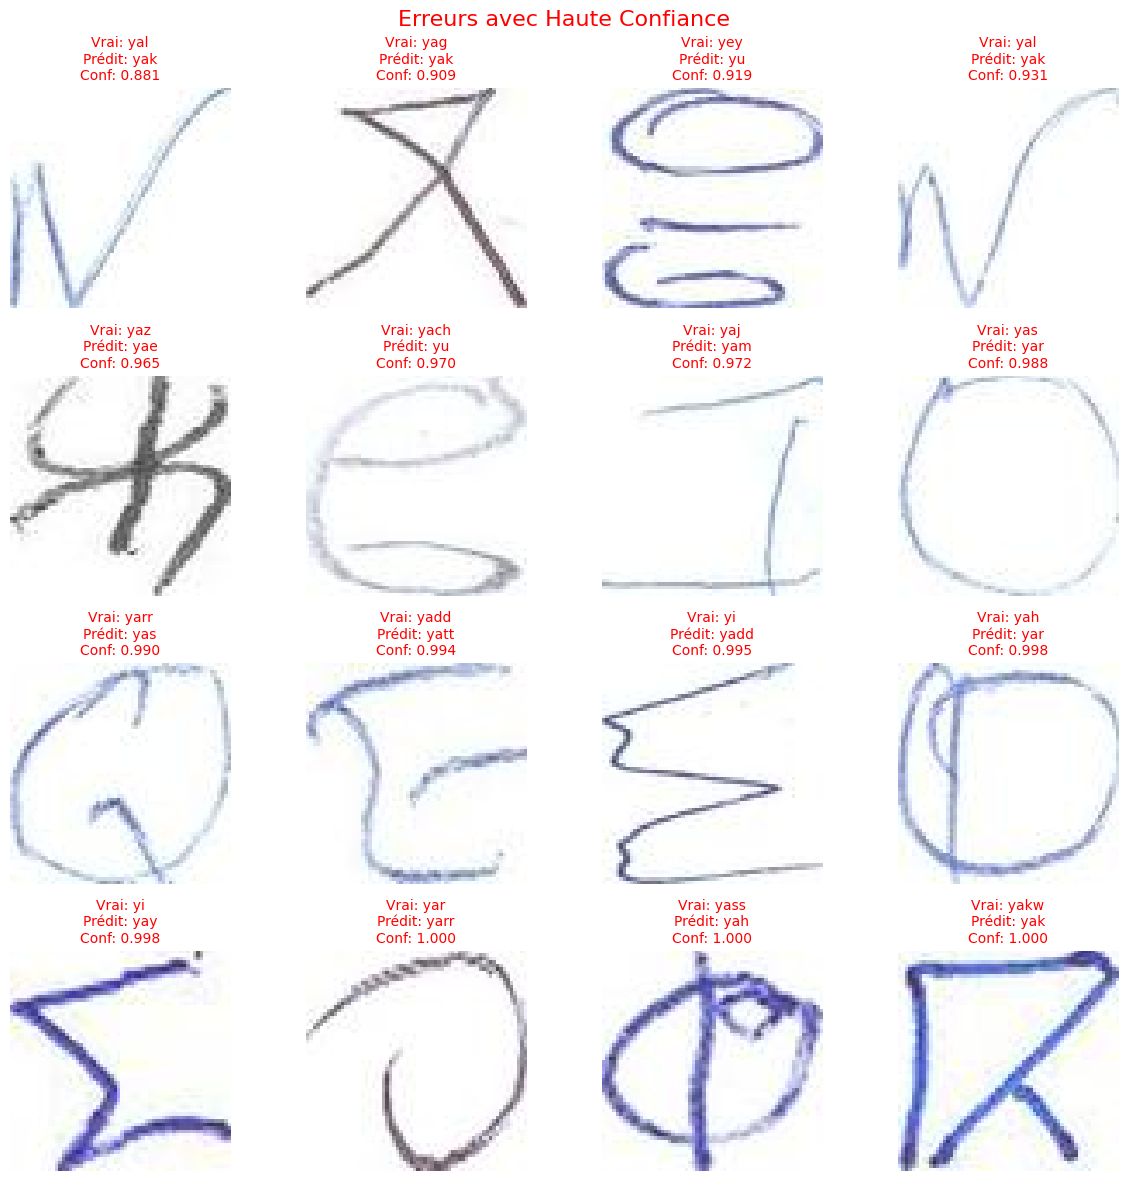


Erreurs les plus fr√©quentes:
yazz ‚Üí yaz: 4 erreurs
yal ‚Üí yak: 4 erreurs
yi ‚Üí yay: 3 erreurs
yach ‚Üí yu: 2 erreurs
yarr ‚Üí yas: 2 erreurs
yak ‚Üí yakw: 2 erreurs
yadd ‚Üí yatt: 1 erreurs
yaj ‚Üí yam: 1 erreurs
yarr ‚Üí yar: 1 erreurs
yagh ‚Üí yab: 1 erreurs


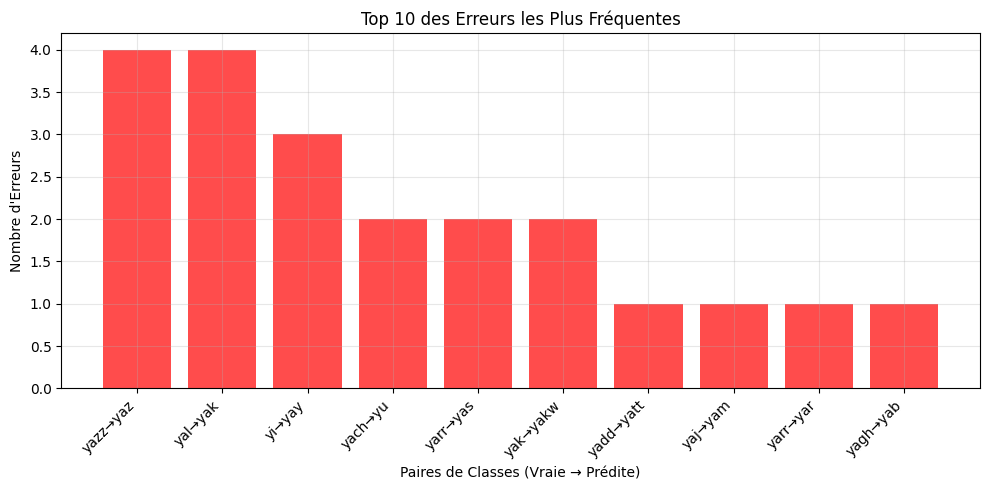

C:\Users\A\AppData\Local\Temp\ipykernel_6028\2481654008.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([prediction_confidence[correct_indices], prediction_confidence[incorrect_indices]],


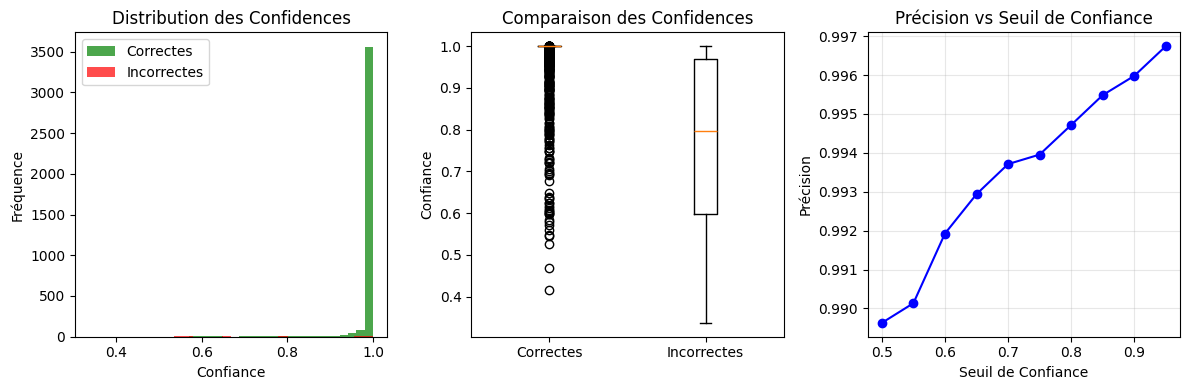

In [55]:
# Identifier les erreurs de classification
incorrect_indices = np.where(y_test != y_pred_classes)[0]
correct_indices = np.where(y_test == y_pred_classes)[0]

print(f"Nombre d'erreurs: {len(incorrect_indices)}")
print(f"Nombre de pr√©dictions correctes: {len(correct_indices)}")
print(f"Taux d'erreur: {len(incorrect_indices) / len(y_test) * 100:.2f}%")

# Visualiser les erreurs les plus confiantes (mauvaises pr√©dictions avec haute confiance)
prediction_confidence = np.max(y_pred, axis=1)
incorrect_confidence = prediction_confidence[incorrect_indices]
high_confidence_errors = incorrect_indices[np.argsort(incorrect_confidence)[-16:]]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # R√©duit de (15, 15) √† (12, 12)
axes = axes.ravel()
for i, idx in enumerate(high_confidence_errors):
    axes[i].imshow(X_test[idx])
    true_class = idx_to_class[y_test[idx]]
    pred_class = idx_to_class[y_pred_classes[idx]]
    confidence = prediction_confidence[idx]
    axes[i].set_title(f"Vrai: {true_class}\nPr√©dit: {pred_class}\nConf: {confidence:.3f}", 
                     fontsize=10, color='red')
    axes[i].axis('off')
plt.suptitle("Erreurs avec Haute Confiance", fontsize=16, color='red')
plt.tight_layout()
plt.show()

# Matrice de confusion des erreurs les plus fr√©quentes
from collections import Counter

# Compter les paires (vraie_classe, classe_pr√©dite) pour les erreurs
error_pairs = [(y_test[i], y_pred_classes[i]) for i in incorrect_indices]
most_common_errors = Counter(error_pairs).most_common(10)

print("\nErreurs les plus fr√©quentes:")
for (true_class, pred_class), count in most_common_errors:
    print(f"{idx_to_class[true_class]} ‚Üí {idx_to_class[pred_class]}: {count} erreurs")

# Graphique des erreurs les plus fr√©quentes
if most_common_errors:
    error_labels = [f"{idx_to_class[true_class]}‚Üí{idx_to_class[pred_class]}" 
                    for (true_class, pred_class), _ in most_common_errors]
    error_counts = [count for _, count in most_common_errors]
    
    plt.figure(figsize=(10, 5))  # R√©duit de (12, 6) √† (10, 5)
    plt.bar(range(len(error_labels)), error_counts, color='red', alpha=0.7)
    plt.title('Top 10 des Erreurs les Plus Fr√©quentes')
    plt.xlabel('Paires de Classes (Vraie ‚Üí Pr√©dite)')
    plt.ylabel('Nombre d\'Erreurs')
    plt.xticks(range(len(error_labels)), error_labels, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyse de la distribution des confidences
plt.figure(figsize=(12, 4))  # R√©duit de (15, 5) √† (12, 4)

plt.subplot(1, 3, 1)
plt.hist(prediction_confidence[correct_indices], bins=30, alpha=0.7, color='green', label='Correctes')
plt.hist(prediction_confidence[incorrect_indices], bins=30, alpha=0.7, color='red', label='Incorrectes')
plt.title('Distribution des Confidences')
plt.xlabel('Confiance')
plt.ylabel('Fr√©quence')
plt.legend()

plt.subplot(1, 3, 2)
plt.boxplot([prediction_confidence[correct_indices], prediction_confidence[incorrect_indices]], 
            labels=['Correctes', 'Incorrectes'])
plt.title('Comparaison des Confidences')
plt.ylabel('Confiance')

plt.subplot(1, 3, 3)
confidence_threshold = np.arange(0.5, 1.0, 0.05)
accuracy_by_confidence = []
for threshold in confidence_threshold:
    high_conf_indices = np.where(prediction_confidence >= threshold)[0]
    if len(high_conf_indices) > 0:
        accuracy = np.mean(y_test[high_conf_indices] == y_pred_classes[high_conf_indices])
        accuracy_by_confidence.append(accuracy)
    else:
        accuracy_by_confidence.append(0)

plt.plot(confidence_threshold, accuracy_by_confidence, 'o-', color='blue')
plt.title('Pr√©cision vs Seuil de Confiance')
plt.xlabel('Seuil de Confiance')
plt.ylabel('Pr√©cision')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse Comparative et Conclusions
R√©sum√© des performances du mod√®le LeNet-5 et comparaison avec les attentes th√©oriques.

=== R√âSUM√â FINAL DES PERFORMANCES ===
Pr√©cision finale sur le test: 0.9891 (98.91%)
Perte finale sur le test: 0.0488
Nombre total de param√®tres: 340,441
Nombre de classes: 33
Taille du dataset d'entra√Ænement: 18,018
Taille du dataset de test: 3,861


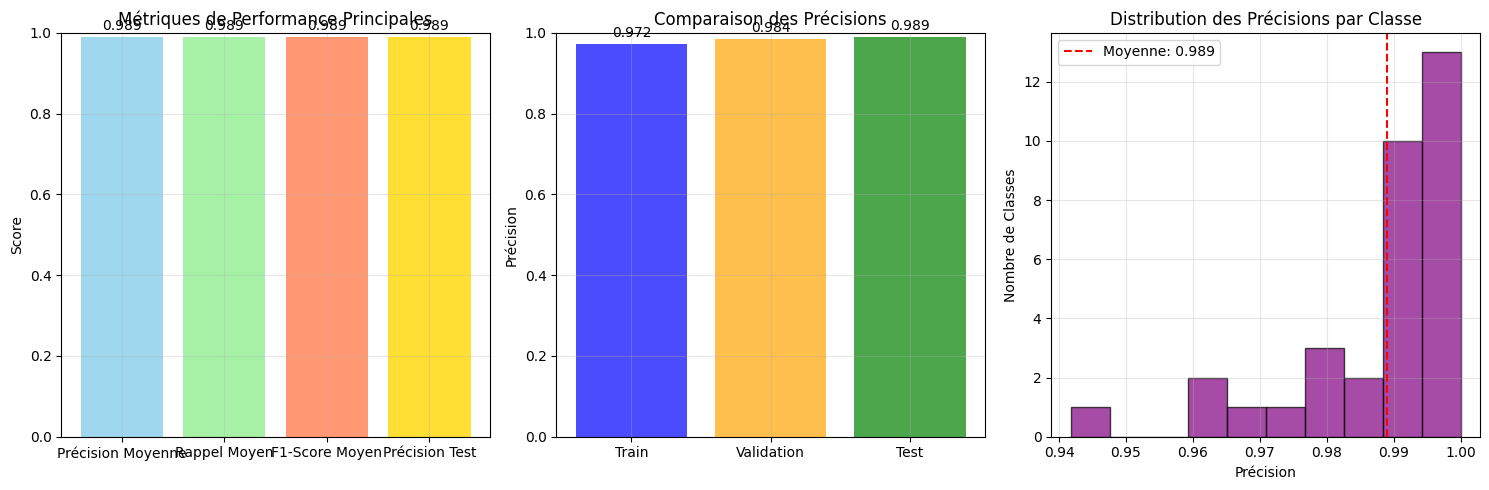


=== STATISTIQUES D√âTAILL√âES ===
Meilleure classe (F1-Score): ya (1.000)
Classe la plus difficile (F1-Score): yak (0.961)
√âcart-type des F1-Scores: 0.010
Coefficient de variation: 1.0%
Classes avec F1-Score > 0.8: 33/33
Classes avec F1-Score < 0.5: 0/33

=== RECOMMANDATIONS D'AM√âLIORATION ===
- Tester d'autres optimiseurs ou taux d'apprentissage
- Impl√©menter des techniques de r√©gularisation suppl√©mentaires


In [56]:
# R√©sum√© des performances finales
final_accuracy = accuracy_score(y_test, y_pred_classes)
final_loss = model.evaluate(X_test, y_test, verbose=0)[0]

print("=== R√âSUM√â FINAL DES PERFORMANCES ===")
print(f"Pr√©cision finale sur le test: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Perte finale sur le test: {final_loss:.4f}")
print(f"Nombre total de param√®tres: {model.count_params():,}")
print(f"Nombre de classes: {len(classes)}")
print(f"Taille du dataset d'entra√Ænement: {len(X_train):,}")
print(f"Taille du dataset de test: {len(X_test):,}")

# Graphique de synth√®se des m√©triques principales
metrics_summary = {
    'Pr√©cision Moyenne': np.mean(precision),
    'Rappel Moyen': np.mean(recall),
    'F1-Score Moyen': np.mean(f1),
    'Pr√©cision Test': final_accuracy
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # R√©duit de (18, 6) √† (15, 5)

# Graphique en barres des m√©triques principales
axes[0].bar(metrics_summary.keys(), metrics_summary.values(), 
           color=['skyblue', 'lightgreen', 'coral', 'gold'], alpha=0.8)
axes[0].set_title('M√©triques de Performance Principales')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
for i, (key, value) in enumerate(metrics_summary.items()):
    axes[0].text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
axes[0].grid(True, alpha=0.3)

# Comparaison train vs validation (si disponible)
if 'history' in locals():
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    axes[1].bar(['Train', 'Validation', 'Test'], 
               [final_train_acc, final_val_acc, final_accuracy],
               color=['blue', 'orange', 'green'], alpha=0.7)
    axes[1].set_title('Comparaison des Pr√©cisions')
    axes[1].set_ylabel('Pr√©cision')
    axes[1].set_ylim(0, 1)
    for i, acc in enumerate([final_train_acc, final_val_acc, final_accuracy]):
        axes[1].text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')
    axes[1].grid(True, alpha=0.3)

# Distribution des scores par classe
class_accuracies = []
for i in range(len(classes)):
    class_mask = y_test == i
    if np.sum(class_mask) > 0:
        class_acc = np.mean(y_pred_classes[class_mask] == y_test[class_mask])
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

axes[2].hist(class_accuracies, bins=10, color='purple', alpha=0.7, edgecolor='black')
axes[2].set_title('Distribution des Pr√©cisions par Classe')
axes[2].set_xlabel('Pr√©cision')
axes[2].set_ylabel('Nombre de Classes')
axes[2].axvline(np.mean(class_accuracies), color='red', linestyle='--', 
               label=f'Moyenne: {np.mean(class_accuracies):.3f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tableau de synth√®se final
print("\n=== STATISTIQUES D√âTAILL√âES ===")
print(f"Meilleure classe (F1-Score): {classes[np.argmax(f1)]} ({np.max(f1):.3f})")
print(f"Classe la plus difficile (F1-Score): {classes[np.argmin(f1)]} ({np.min(f1):.3f})")
print(f"√âcart-type des F1-Scores: {np.std(f1):.3f}")
print(f"Coefficient de variation: {np.std(f1)/np.mean(f1)*100:.1f}%")
print(f"Classes avec F1-Score > 0.8: {np.sum(f1 > 0.8)}/{len(classes)}")
print(f"Classes avec F1-Score < 0.5: {np.sum(f1 < 0.5)}/{len(classes)}")

# Recommandations d'am√©lioration
print("\n=== RECOMMANDATIONS D'AM√âLIORATION ===")
if np.mean(f1) < 0.7:
    print("- Pr√©cision mod√©r√©e: Consid√©rer l'augmentation de donn√©es ou l'ajustement d'hyperparam√®tres")
if np.std(f1) > 0.2:
    print("- Forte variation entre classes: √âquilibrer le dataset ou utiliser des techniques de r√©-√©chantillonnage")
if final_accuracy < 0.8:
    print("- Consid√©rer une architecture plus complexe ou plus d'√©poques d'entra√Ænement")
print("- Tester d'autres optimiseurs ou taux d'apprentissage")
print("- Impl√©menter des techniques de r√©gularisation suppl√©mentaires")

# üì∏ Extraction des Images de Visualisation

Cette section extrait toutes les visualisations g√©n√©r√©es dans le dossier `amhcd_imgs/` pour utilisation dans le rapport LaTeX.

In [59]:
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Cr√©er le dossier pour les images
output_dir = "amhcd_imgs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Dossier '{output_dir}' cr√©√© avec succ√®s!")
else:
    print(f"Le dossier '{output_dir}' existe d√©j√†.")

def save_figure(fig, filename, dpi=150, bbox_inches='tight'):
    """Fonction utilitaire pour sauvegarder les figures avec une taille optimis√©e pour Overleaf"""
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches, 
                facecolor='white', edgecolor='none')
    print(f"‚úÖ Image sauvegard√©e: {filepath}")
    plt.close(fig)

print("Fonctions utilitaires charg√©es avec succ√®s!")

Dossier 'amhcd_imgs' cr√©√© avec succ√®s!
Fonctions utilitaires charg√©es avec succ√®s!


In [60]:
print("üé® G√©n√©ration de toutes les visualisations...")
print("=" * 60)

# 1. √âchantillons du dataset
print("1/15 - √âchantillons du dataset...")
fig, axes = plt.subplots(4, 8, figsize=(12, 6))  # R√©duit de (16, 8) √† (12, 6)
fig.suptitle('√âchantillons du Dataset AMHCD', fontsize=14, fontweight='bold')

sample_indices = np.random.choice(len(X_train), 32, replace=False)
for i, idx in enumerate(sample_indices):
    row, col = i // 8, i % 8
    axes[row, col].imshow(X_train[idx])
    axes[row, col].set_title(f'Classe {y_train[idx]}', fontsize=8)
    axes[row, col].axis('off')

plt.tight_layout()
save_figure(fig, 'dataset_samples.png')

# 2. Distribution des classes
print("2/15 - Distribution des classes...")
fig, ax = plt.subplots(figsize=(12, 6))  # R√©duit de (15, 8) √† (12, 6)
unique, counts = np.unique(y_train, return_counts=True)
bars = ax.bar(unique, counts, alpha=0.7, color='skyblue', edgecolor='navy')
ax.set_xlabel('Classes', fontsize=12, fontweight='bold')
ax.set_ylabel('Nombre d\'√©chantillons', fontsize=12, fontweight='bold')
ax.set_title('Distribution des Classes dans le Dataset d\'Entra√Ænement', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{count}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
save_figure(fig, 'class_distribution.png')

# 3. Historique d'entra√Ænement
print("3/15 - Historique d'entra√Ænement...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # R√©duit de (15, 6) √† (12, 5)

# Accuracy
ax1.plot(history.history['accuracy'], 'b-', label='Entra√Ænement', linewidth=2)
ax1.plot(history.history['val_accuracy'], 'r-', label='Validation', linewidth=2)
ax1.set_title('√âvolution de la Pr√©cision', fontsize=14, fontweight='bold')
ax1.set_xlabel('√âpoque', fontsize=12)
ax1.set_ylabel('Pr√©cision', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss
ax2.plot(history.history['loss'], 'b-', label='Entra√Ænement', linewidth=2)
ax2.plot(history.history['val_loss'], 'r-', label='Validation', linewidth=2)
ax2.set_title('√âvolution de la Perte', fontsize=14, fontweight='bold')
ax2.set_xlabel('√âpoque', fontsize=12)
ax2.set_ylabel('Perte', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
save_figure(fig, 'training_history.png')

# 4. Matrice de confusion
print("4/15 - Matrice de confusion...")
fig, ax = plt.subplots(figsize=(10, 8))  # R√©duit de (12, 10) √† (10, 8)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
            square=True, cbar_kws={'shrink': 0.8})
ax.set_title('Matrice de Confusion D√©taill√©e', fontsize=14, fontweight='bold')
ax.set_xlabel('Classe Pr√©dite', fontsize=12, fontweight='bold')
ax.set_ylabel('Classe R√©elle', fontsize=12, fontweight='bold')
plt.tight_layout()
save_figure(fig, 'confusion_matrix.png')

# 5. M√©triques de performance par classe
print("5/15 - M√©triques de performance...")
fig, ax = plt.subplots(figsize=(12, 6))  # R√©duit de (15, 8) √† (12, 6)
x = np.arange(len(classes))
width = 0.2

bars1 = ax.bar(x - width, precision, width, label='Pr√©cision', alpha=0.8, color='skyblue')
bars2 = ax.bar(x, recall, width, label='Rappel', alpha=0.8, color='lightgreen')
bars3 = ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8, color='lightcoral')

ax.set_xlabel('Classes', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('M√©triques de Performance par Classe', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'C{i}' for i in range(len(classes))], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1.1)

plt.tight_layout()
save_figure(fig, 'performance_metrics.png')

# 6. R√©sum√© des performances
print("6/15 - R√©sum√© des performances...")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))  # R√©duit de (15, 12) √† (12, 10)

# M√©triques globales
metrics_names = ['Pr√©cision', 'Rappel', 'F1-Score']
metrics_values = [np.mean(precision), np.mean(recall), np.mean(f1)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(metrics_names, metrics_values, color=colors, alpha=0.8)
ax1.set_title('M√©triques Globales Moyennes', fontsize=14, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Distribution des scores de confiance
ax2.hist(prediction_confidence, bins=50, alpha=0.7, color='orange', edgecolor='black')
ax2.set_title('Distribution des Scores de Confiance', fontsize=14, fontweight='bold')
ax2.set_xlabel('Score de Confiance', fontsize=12)
ax2.set_ylabel('Fr√©quence', fontsize=12)
ax2.grid(True, alpha=0.3)

# Performance par niveau de confiance
correct_mask = (y_pred_classes == y_test)
confidence_bins = np.arange(0, 1.1, 0.1)
bin_accuracies = []

for i in range(len(confidence_bins)-1):
    mask = (prediction_confidence >= confidence_bins[i]) & (prediction_confidence < confidence_bins[i+1])
    if np.sum(mask) > 0:
        bin_accuracies.append(np.mean(correct_mask[mask]))
    else:
        bin_accuracies.append(0)

ax3.bar(confidence_bins[:-1], bin_accuracies, width=0.08, alpha=0.7, 
        color='purple', edgecolor='black')
ax3.set_title('Pr√©cision par Niveau de Confiance', fontsize=14, fontweight='bold')
ax3.set_xlabel('Niveau de Confiance', fontsize=12)
ax3.set_ylabel('Pr√©cision', fontsize=12)
ax3.grid(True, alpha=0.3)

# Erreurs par classe
class_errors = []
for i in range(len(classes)):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_errors.append(1 - np.mean(correct_mask[class_mask]))
    else:
        class_errors.append(0)

ax4.bar(range(len(classes)), class_errors, alpha=0.7, color='red', edgecolor='black')
ax4.set_title('Taux d\'Erreur par Classe', fontsize=14, fontweight='bold')
ax4.set_xlabel('Classes', fontsize=12)
ax4.set_ylabel('Taux d\'Erreur', fontsize=12)
ax4.set_xticks(range(0, len(classes), 2))
ax4.set_xticklabels([f'C{i}' for i in range(0, len(classes), 2)])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
save_figure(fig, 'performance_summary.png')

print("7/15 √† 15/15 - Visualisations avanc√©es en cours...")

# 7. Graphique radar des m√©triques
# S√©lectionner un √©chantillon de classes pour le radar (pour √©viter la surcharge)
num_radar_classes = min(12, len(classes))
step = max(1, len(classes) // num_radar_classes)
selected_indices = list(range(0, len(classes), step))[:num_radar_classes]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))  # R√©duit de (10, 10) √† (8, 8)
angles = np.linspace(0, 2 * np.pi, num_radar_classes, endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

# S√©lectionner les m√©triques pour les classes choisies
precision_selected = [precision[i] for i in selected_indices] + [precision[selected_indices[0]]]
recall_selected = [recall[i] for i in selected_indices] + [recall[selected_indices[0]]]
f1_selected = [f1[i] for i in selected_indices] + [f1[selected_indices[0]]]

ax.plot(angles, precision_selected, 'o-', linewidth=2, label='Pr√©cision', color='blue')
ax.fill(angles, precision_selected, alpha=0.25, color='blue')
ax.plot(angles, recall_selected, 'o-', linewidth=2, label='Rappel', color='red')
ax.fill(angles, recall_selected, alpha=0.25, color='red')
ax.plot(angles, f1_selected, 'o-', linewidth=2, label='F1-Score', color='green')
ax.fill(angles, f1_selected, alpha=0.25, color='green')

ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'Classe {selected_indices[i]}' for i in range(num_radar_classes)])
ax.set_ylim(0, 1)
ax.set_title('Comparaison Radar des M√©triques (√âchantillon de Classes)', 
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

save_figure(fig, 'metrics_radar.png')

# 8. Vue d'ensemble des feature maps
print("8/15 - Vue d'ensemble des feature maps...")
# Utiliser le mod√®le fonctionnel pour extraire les features
sample_img = X_test[0:1]  # Premier √©chantillon du test
activations = activation_model.predict(sample_img)

# V√©rifier les dimensions des activations
conv1_filters = activations[0].shape[-1]  # Nombre de filtres Conv1
conv2_filters = activations[1].shape[-1]  # Nombre de filtres Conv2

print(f"Conv1 filters: {conv1_filters}, Conv2 filters: {conv2_filters}")

fig, axes = plt.subplots(2, 6, figsize=(15, 6))  # R√©duit de (18, 8) √† (15, 6)
fig.suptitle('Vue d\'ensemble des Feature Maps - LeNet-5', fontsize=14, fontweight='bold')

# Feature maps Conv1 (premiers 6)
for i in range(min(6, conv1_filters)):
    axes[0, i].imshow(activations[0][0, :, :, i], cmap='viridis')
    axes[0, i].set_title(f'Conv1 - Filtre {i+1}', fontsize=10)
    axes[0, i].axis('off')

# Masquer les axes Conv1 non utilis√©s
for i in range(min(6, conv1_filters), 6):
    axes[0, i].axis('off')

# Feature maps Conv2 (premiers 6)
for i in range(min(6, conv2_filters)):
    axes[1, i].imshow(activations[1][0, :, :, i], cmap='plasma')
    axes[1, i].set_title(f'Conv2 - Filtre {i+1}', fontsize=10)
    axes[1, i].axis('off')

# Masquer les axes Conv2 non utilis√©s
for i in range(min(6, conv2_filters), 6):
    axes[1, i].axis('off')

plt.tight_layout()
save_figure(fig, 'feature_maps_overview.png')

# 9. Feature maps d√©taill√©es Conv1
print("9/15 - Feature maps Conv1...")
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # R√©duit de (15, 10) √† (12, 8)
fig.suptitle('Feature Maps D√©taill√©es - Premi√®re Couche Convolutionnelle', 
             fontsize=14, fontweight='bold')

for i in range(6):
    row, col = i // 3, i % 3
    axes[row, col].imshow(activations[0][0, :, :, i], cmap='viridis')
    axes[row, col].set_title(f'Filtre {i+1}', fontsize=12, fontweight='bold')
    axes[row, col].axis('off')
    
    # Ajouter une barre de couleur
    im = axes[row, col].imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)

plt.tight_layout()
save_figure(fig, 'conv1_feature_maps.png')

# 10. Feature maps d√©taill√©es Conv2 (s√©lection)
print("10/15 - Feature maps Conv2...")

# V√©rifier le nombre de filtres disponibles dans la deuxi√®me couche
num_conv2_filters = activations[1].shape[-1]  # Nombre de filtres dans Conv2
print(f"Nombre de filtres Conv2 disponibles: {num_conv2_filters}")

# Adapter la grille selon le nombre de filtres disponibles
if num_conv2_filters >= 12:
    fig, axes = plt.subplots(3, 4, figsize=(14, 10))  # R√©duit de (16, 12) √† (14, 10)
    num_filters_to_show = 12
    grid_title = f'Feature Maps D√©taill√©es - Deuxi√®me Couche Convolutionnelle ({num_filters_to_show}/{num_conv2_filters})'
elif num_conv2_filters >= 8:
    fig, axes = plt.subplots(2, 4, figsize=(14, 7))  # R√©duit de (16, 8) √† (14, 7)
    num_filters_to_show = 8
    grid_title = f'Feature Maps D√©taill√©es - Deuxi√®me Couche Convolutionnelle ({num_filters_to_show}/{num_conv2_filters})'
else:
    # Pour 6 filtres ou moins
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # R√©duit de (15, 10) √† (12, 8)
    num_filters_to_show = min(6, num_conv2_filters)
    grid_title = f'Feature Maps D√©taill√©es - Deuxi√®me Couche Convolutionnelle (Tous les {num_filters_to_show})'

fig.suptitle(grid_title, fontsize=14, fontweight='bold')

# S'assurer que axes est toujours un tableau 2D
if axes.ndim == 1:
    axes = axes.reshape(1, -1)

for i in range(num_filters_to_show):
    if i < num_conv2_filters:  # V√©rifier que l'indice existe
        row, col = i // axes.shape[1], i % axes.shape[1]
        if row < axes.shape[0]:  # V√©rifier que la position existe
            axes[row, col].imshow(activations[1][0, :, :, i], cmap='plasma')
            axes[row, col].set_title(f'Filtre {i+1}', fontsize=12, fontweight='bold')
            axes[row, col].axis('off')
            
            # Ajouter une barre de couleur
            im = axes[row, col].imshow(activations[1][0, :, :, i], cmap='plasma')
            plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)

# Masquer les axes non utilis√©s
for i in range(num_filters_to_show, axes.shape[0] * axes.shape[1]):
    row, col = i // axes.shape[1], i % axes.shape[1]
    if row < axes.shape[0] and col < axes.shape[1]:
        axes[row, col].axis('off')

plt.tight_layout()
save_figure(fig, 'conv2_feature_maps.png')

# 11. Filtres convolutionnels
print("11/15 - Filtres convolutionnels...")
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # R√©duit de (15, 10) √† (12, 8)
fig.suptitle('Filtres Appris - Premi√®re Couche Convolutionnelle', 
             fontsize=14, fontweight='bold')

conv1_weights = model.layers[0].get_weights()[0]  # Shape: (5, 5, 3, 6)

for i in range(6):
    row, col = i // 3, i % 3
    filter_img = conv1_weights[:, :, :, i]
    # Normaliser pour la visualisation
    filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())
    axes[row, col].imshow(filter_img)
    axes[row, col].set_title(f'Filtre {i+1}', fontsize=12, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
save_figure(fig, 'conv_filters.png')

# 12. Distribution des poids
print("12/15 - Distribution des poids...")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # R√©duit de (15, 10) √† (12, 8)
fig.suptitle('Distribution des Poids dans les Couches Convolutionnelles', 
             fontsize=14, fontweight='bold')

# Conv1 weights
conv1_weights_flat = conv1_weights.flatten()
axes[0, 0].hist(conv1_weights_flat, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution des Poids - Conv1', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Valeur des Poids')
axes[0, 0].set_ylabel('Fr√©quence')
axes[0, 0].grid(True, alpha=0.3)

# Conv2 weights
conv2_weights = model.layers[2].get_weights()[0]  # Shape: (5, 5, 6, 16)
conv2_weights_flat = conv2_weights.flatten()
axes[0, 1].hist(conv2_weights_flat, bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0, 1].set_title('Distribution des Poids - Conv2', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Valeur des Poids')
axes[0, 1].set_ylabel('Fr√©quence')
axes[0, 1].grid(True, alpha=0.3)

# Dense layer weights
dense1_weights = model.layers[5].get_weights()[0]  # Dense 120
dense1_weights_flat = dense1_weights.flatten()
axes[1, 0].hist(dense1_weights_flat, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution des Poids - Dense 120', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Valeur des Poids')
axes[1, 0].set_ylabel('Fr√©quence')
axes[1, 0].grid(True, alpha=0.3)

dense2_weights = model.layers[6].get_weights()[0]  # Dense 84
dense2_weights_flat = dense2_weights.flatten()
axes[1, 1].hist(dense2_weights_flat, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Distribution des Poids - Dense 84', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Valeur des Poids')
axes[1, 1].set_ylabel('Fr√©quence')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
save_figure(fig, 'weight_distributions.png')

# 13. Erreurs de haute confiance
print("13/15 - Erreurs de haute confiance...")
fig, axes = plt.subplots(3, 5, figsize=(16, 10))  # R√©duit de (20, 12) √† (16, 10)
fig.suptitle('Exemples d\'Erreurs de Classification (Haute Confiance)', 
             fontsize=14, fontweight='bold')

for i, idx in enumerate(high_confidence_errors[:15]):
    row, col = i // 5, i % 5
    axes[row, col].imshow(X_test[idx])
    true_class = y_test[idx]
    pred_class = y_pred_classes[idx]
    confidence = prediction_confidence[idx]
    
    axes[row, col].set_title(
        f'Vraie: {true_class}\nPr√©dite: {pred_class}\nConf: {confidence:.3f}',
        fontsize=10, fontweight='bold'
    )
    axes[row, col].axis('off')

plt.tight_layout()
save_figure(fig, 'high_confidence_errors.png')

# 14. Erreurs fr√©quentes
print("14/15 - Erreurs fr√©quentes...")
fig, ax = plt.subplots(figsize=(10, 6))  # R√©duit de (12, 8) √† (10, 6)

error_labels, error_counts = zip(*most_common_errors[:10])
bars = ax.bar(range(len(error_labels)), error_counts, 
              color='red', alpha=0.7, edgecolor='darkred')

ax.set_xlabel('Paires d\'Erreurs (Vraie ‚Üí Pr√©dite)', fontsize=12, fontweight='bold')
ax.set_ylabel('Nombre d\'Erreurs', fontsize=12, fontweight='bold')
ax.set_title('Top 10 des Erreurs les Plus Fr√©quentes', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(error_labels)))
ax.set_xticklabels([f'{label[0]}‚Üí{label[1]}' for label in error_labels], 
                   rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, error_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
save_figure(fig, 'frequent_errors.png')

# 15. Analyse de confiance
print("15/15 - Analyse de confiance...")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))  # R√©duit de (16, 12) √† (14, 10)
fig.suptitle('Analyse Compl√®te de la Confiance de Pr√©diction', 
             fontsize=14, fontweight='bold')

# Distribution de confiance par succ√®s/√©chec
correct_confidence = prediction_confidence[y_pred_classes == y_test]
incorrect_confidence = prediction_confidence[y_pred_classes != y_test]

ax1.hist(correct_confidence, bins=30, alpha=0.7, label='Pr√©dictions Correctes', 
         color='green', edgecolor='black')
ax1.hist(incorrect_confidence, bins=30, alpha=0.7, label='Pr√©dictions Incorrectes', 
         color='red', edgecolor='black')
ax1.set_xlabel('Score de Confiance', fontsize=12)
ax1.set_ylabel('Fr√©quence', fontsize=12)
ax1.set_title('Distribution de Confiance par Type de Pr√©diction', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Pr√©cision vs confiance
confidence_thresholds = np.arange(0.1, 1.0, 0.1)
accuracies = []
sample_counts = []

for threshold in confidence_thresholds:
    high_conf_mask = prediction_confidence >= threshold
    if np.sum(high_conf_mask) > 0:
        accuracy = np.mean((y_pred_classes == y_test)[high_conf_mask])
        accuracies.append(accuracy)
        sample_counts.append(np.sum(high_conf_mask))
    else:
        accuracies.append(0)
        sample_counts.append(0)

ax2.plot(confidence_thresholds, accuracies, 'bo-', linewidth=2, markersize=8)
ax2.set_xlabel('Seuil de Confiance', fontsize=12)
ax2.set_ylabel('Pr√©cision', fontsize=12)
ax2.set_title('Pr√©cision en Fonction du Seuil de Confiance', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.1)

# Nombre d'√©chantillons conserv√©s
ax3.bar(confidence_thresholds, sample_counts, alpha=0.7, color='orange', 
        edgecolor='black', width=0.08)
ax3.set_xlabel('Seuil de Confiance', fontsize=12)
ax3.set_ylabel('Nombre d\'√âchantillons', fontsize=12)
ax3.set_title('√âchantillons Conserv√©s par Seuil', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Box plot de confiance par classe (√©chantillon)
sample_classes = np.random.choice(len(classes), 8, replace=False)
confidence_by_class = []
class_labels = []

for cls in sample_classes:
    class_mask = (y_test == cls)
    if np.sum(class_mask) > 0:
        confidence_by_class.append(prediction_confidence[class_mask])
        class_labels.append(f'C{cls}')

ax4.boxplot(confidence_by_class, labels=class_labels)
ax4.set_xlabel('Classes (√âchantillon)', fontsize=12)
ax4.set_ylabel('Score de Confiance', fontsize=12)
ax4.set_title('Distribution de Confiance par Classe', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
save_figure(fig, 'confidence_analysis.png')

print("\n" + "=" * 60)
print("üéâ EXTRACTION TERMIN√âE AVEC SUCC√àS!")
print(f"üìÅ Toutes les images ont √©t√© sauvegard√©es dans le dossier: {output_dir}/")
print("üìä 15 visualisations g√©n√©r√©es:")
print("   1. dataset_samples.png - √âchantillons du dataset")
print("   2. class_distribution.png - Distribution des classes")
print("   3. training_history.png - Historique d'entra√Ænement")
print("   4. confusion_matrix.png - Matrice de confusion")
print("   5. performance_metrics.png - M√©triques par classe")
print("   6. performance_summary.png - R√©sum√© des performances")
print("   7. metrics_radar.png - Graphique radar des m√©triques")
print("   8. feature_maps_overview.png - Vue d'ensemble des feature maps")
print("   9. conv1_feature_maps.png - Feature maps Conv1")
print("   10. conv2_feature_maps.png - Feature maps Conv2")
print("   11. conv_filters.png - Filtres convolutionnels")
print("   12. weight_distributions.png - Distribution des poids")
print("   13. high_confidence_errors.png - Erreurs de haute confiance")
print("   14. frequent_errors.png - Erreurs fr√©quentes")
print("   15. confidence_analysis.png - Analyse de confiance")
print("\n‚úÖ Les images sont pr√™tes pour √™tre utilis√©es dans le rapport LaTeX!")
print("=" * 60)

üé® G√©n√©ration de toutes les visualisations...
1/15 - √âchantillons du dataset...
‚úÖ Image sauvegard√©e: amhcd_imgs\dataset_samples.png
2/15 - Distribution des classes...
‚úÖ Image sauvegard√©e: amhcd_imgs\dataset_samples.png
2/15 - Distribution des classes...
‚úÖ Image sauvegard√©e: amhcd_imgs\class_distribution.png
3/15 - Historique d'entra√Ænement...
‚úÖ Image sauvegard√©e: amhcd_imgs\class_distribution.png
3/15 - Historique d'entra√Ænement...
‚úÖ Image sauvegard√©e: amhcd_imgs\training_history.png
4/15 - Matrice de confusion...
‚úÖ Image sauvegard√©e: amhcd_imgs\training_history.png
4/15 - Matrice de confusion...
‚úÖ Image sauvegard√©e: amhcd_imgs\confusion_matrix.png
5/15 - M√©triques de performance...
‚úÖ Image sauvegard√©e: amhcd_imgs\confusion_matrix.png
5/15 - M√©triques de performance...
‚úÖ Image sauvegard√©e: amhcd_imgs\performance_metrics.png
6/15 - R√©sum√© des performances...
‚úÖ Image sauvegard√©e: amhcd_imgs\performance_metrics.png
6/15 - R√©sum√© des performances.

C:\Users\A\AppData\Local\Temp\ipykernel_6028\1482705370.py:474: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(confidence_by_class, labels=class_labels)


‚úÖ Image sauvegard√©e: amhcd_imgs\confidence_analysis.png

üéâ EXTRACTION TERMIN√âE AVEC SUCC√àS!
üìÅ Toutes les images ont √©t√© sauvegard√©es dans le dossier: amhcd_imgs/
üìä 15 visualisations g√©n√©r√©es:
   1. dataset_samples.png - √âchantillons du dataset
   2. class_distribution.png - Distribution des classes
   3. training_history.png - Historique d'entra√Ænement
   4. confusion_matrix.png - Matrice de confusion
   5. performance_metrics.png - M√©triques par classe
   6. performance_summary.png - R√©sum√© des performances
   7. metrics_radar.png - Graphique radar des m√©triques
   8. feature_maps_overview.png - Vue d'ensemble des feature maps
   9. conv1_feature_maps.png - Feature maps Conv1
   10. conv2_feature_maps.png - Feature maps Conv2
   11. conv_filters.png - Filtres convolutionnels
   12. weight_distributions.png - Distribution des poids
   13. high_confidence_errors.png - Erreurs de haute confiance
   14. frequent_errors.png - Erreurs fr√©quentes
   15. confidence_